In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
#Use the citypy module to determine city based on latitude and logitude
#Import the dependencies
import pandas as pd

import numpy as np
from citipy import citipy

In [3]:
#Create a practice set of random latitude and longitude combinations 
lats = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
lngs = [-67.59741259, 11.09532135, 74.84233102, -76.89276677, -61.13376282]
lat_lngs = zip(lats,lngs)
lat_lngs

In [4]:
lats = np.random.uniform(low=-90.000, high= 90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs) #zip packs each pair of lats and lngs as having the ame index in their respective array into a tuple
lat_lngs #if there are 51500 lats and longs there will be 1500 tuples of paired latitudes and longitudes, where each can be accessed 
#by the index of 0 and 1

In [5]:
#Add the latitudes and longitudes to a list
coordinates = list(lat_lngs) 

In [6]:
#Use the print() function to display the latitude and longitude combination; You can only unzip a zipped tuple once before it is removed from computers memory
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
    citipy.nearest_city(coordinate[0], coordinate[1]).country_code)     
#outputs lat and lng coordinates, once we have those coordinates we iterate through the list of tuples 
#and find the nearest city

victoria sc
xining cn
puerto ayora ec
paamiut gl
ushuaia ar
arraial do cabo br
rikitea pf
punta arenas cl
pisco pe
westerland de
busselton au
adrar dz
norman wells ca
san patricio mx
bluff nz
tsihombe mg
bredasdorp za
avarua ck
new norfolk au
mataura pf
inhambane mz
hobart au
hermanus za
port elizabeth za
mahebourg mu
norman wells ca
solano co
nizhneyansk ru
vaini to
victoria sc
punta arenas cl
bimbo cf
albany au
kapaa us
keetmanshoop na
katsuura jp
busselton au
busselton au
souillac mu
nampula mz
barentsburg sj
albany au
mataura pf
busselton au
rikitea pf
nikolskoye ru
mataura pf
vaini to
belushya guba ru
hithadhoo mv
port elizabeth za
severodvinsk ru
albany au
balakhta ru
lagoa pt
illoqqortoormiut gl
busselton au
cay tr
carnarvon au
cape town za
mataura pf
kodiak us
iqaluit ca
birjand ir
bluff nz
hobart au
attawapiskat ca
bluff nz
punta arenas cl
avarua ck
koslan ru
bluff nz
tasiilaq gl
kapaa us
new norfolk au
touros br
arraial do cabo br
tuktoyaktuk ca
new norfolk au
meru ke
sotniko

narsaq gl
hambantota lk
taolanaro mg
taolanaro mg
san rafael ar
rikitea pf
new norfolk au
arraial do cabo br
vaini to
ulladulla au
hobart au
chokurdakh ru
bin qirdan tn
bluff nz
kwakoa tz
champerico gt
mar del plata ar
vaini to
sheltozero ru
chokurdakh ru
georgetown sh
tsihombe mg
smithers ca
kapaa us
kazalinsk kz
sobolevo ru
akcakoca tr
butaritari ki
taolanaro mg
belushya guba ru
sao joao da barra br
bonavista ca
hilo us
ushuaia ar
vaini to
ushuaia ar
taolanaro mg
severo-kurilsk ru
yellowknife ca
albany au
carballo es
severnyy ru
guanica us
cape town za
la sarre ca
bredasdorp za
severo-kurilsk ru
rawannawi ki
quatre cocos mu
youghal ie
komsomolskiy ru
lorengau pg
hermanus za
te anau nz
busselton au
mataura pf
palabuhanratu id
ushuaia ar
hithadhoo mv
cape town za
leh in
jamestown sh
vardo no
lebu cl
tsihombe mg
upernavik gl
homer us
port elizabeth za
busselton au
vaini to
yanam in
nyandoma ru
dikson ru
rikitea pf
iqaluit ca
ponta do sol cv
rikitea pf
rikitea pf
kautokeino no
kapaa us
c

baykit ru
avarua ck
ushuaia ar
boyuibe bo
avarua ck
dikson ru
jamestown sh
bargal so
victoria sc
urengoy ru
daxian cn
goderich sl
albany au
turayf sa
isoka zm
manzil tamim tn
barrow us
castro cl
amderma ru
barrow us
hilo us
codrington ag
larap ph
port hedland au
mataura pf
barrow us
boulder city us
havre-saint-pierre ca
kununurra au
faanui pf


In [7]:
#Use the print() function to display the latitude and lognitude combinations through a for loop
cities = [] # we create a cities list to store city names
#Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates: #iterate through the coordinates, and retrieve nearest city using lat/lng pair
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name 
                               
                               
    #If the city is unique, then we will add it to the cities list. 
    if city not in cities: #add a decision statement with the logical operator not in to determine whether the found city is in
        cities.append(city) #cities list. If not, then use append() function to add it b/c among 1500 lat/lngs, there'll be copies
 #Print the city count to confirm sufficient count 
len(cities) #want to capture only unique cities

622

In [8]:
import requests as req
from config import weather_api_key

In [9]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
  #google open api weather documentation

In [10]:
import time
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

#Initialized the counters at 1 b/c we want the first iteration of the logging for each recorded response

Beginning Data Retrieval     
-----------------------------


In [12]:
# Loop through all the cities in our list.
for i in range(len(city)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(5)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city[i]

In [13]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(5)
    url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = req.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                         "Date": city_date})

# If an error is experienced, skip the city.
    except Exception as e:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | victoria
Processing Record 2 of Set 1 | xining
Processing Record 3 of Set 1 | puerto ayora
Processing Record 4 of Set 1 | paamiut
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | arraial do cabo
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | pisco
Processing Record 10 of Set 1 | westerland
Processing Record 11 of Set 1 | busselton
Processing Record 12 of Set 1 | adrar
Processing Record 13 of Set 1 | norman wells
Processing Record 14 of Set 1 | san patricio
Processing Record 15 of Set 1 | bluff
Processing Record 16 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 17 of Set 1 | bredasdorp
Processing Record 18 of Set 1 | avarua
Processing Record 19 of Set 1 | new norfolk
Processing Record 20 of Set 1 | mataura
Processing Record 21 of Set 1 | inhambane
Processing Record 22 of Set 1 | hobart
Processing Record 23 of Set 1 | hermanus
Processing Record 24 of S

Processing Record 39 of Set 4 | hobyo
Processing Record 40 of Set 4 | mount isa
Processing Record 41 of Set 4 | lalin
Processing Record 42 of Set 4 | port-gentil
Processing Record 43 of Set 4 | hasaki
Processing Record 44 of Set 4 | nishihara
Processing Record 45 of Set 4 | provideniya
Processing Record 46 of Set 4 | buraydah
Processing Record 47 of Set 4 | nadym
Processing Record 48 of Set 4 | antofagasta
Processing Record 49 of Set 4 | georgetown
Processing Record 50 of Set 4 | yandoon
City not found. Skipping...
Processing Record 1 of Set 5 | clyde river
Processing Record 2 of Set 5 | ca mau
Processing Record 3 of Set 5 | totolapan
Processing Record 4 of Set 5 | bukavu
Processing Record 5 of Set 5 | saskylakh
Processing Record 6 of Set 5 | saint-pierre
Processing Record 7 of Set 5 | lubao
Processing Record 8 of Set 5 | curaca
Processing Record 9 of Set 5 | naranjito
Processing Record 10 of Set 5 | patitirion
Processing Record 11 of Set 5 | darab
Processing Record 12 of Set 5 | esper

Processing Record 30 of Set 8 | bin qirdan
Processing Record 31 of Set 8 | kwakoa
Processing Record 32 of Set 8 | champerico
Processing Record 33 of Set 8 | sheltozero
Processing Record 34 of Set 8 | kazalinsk
City not found. Skipping...
Processing Record 35 of Set 8 | akcakoca
Processing Record 36 of Set 8 | sao joao da barra
Processing Record 37 of Set 8 | carballo
Processing Record 38 of Set 8 | severnyy
Processing Record 39 of Set 8 | guanica
Processing Record 40 of Set 8 | la sarre
Processing Record 41 of Set 8 | rawannawi
City not found. Skipping...
Processing Record 42 of Set 8 | quatre cocos
Processing Record 43 of Set 8 | youghal
Processing Record 44 of Set 8 | komsomolskiy
Processing Record 45 of Set 8 | te anau
Processing Record 46 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 47 of Set 8 | leh
Processing Record 48 of Set 8 | homer
Processing Record 49 of Set 8 | yanam
Processing Record 50 of Set 8 | nyandoma
Processing Record 1 of Set 9 | ponta do s

Processing Record 19 of Set 12 | freeport
Processing Record 20 of Set 12 | gladstone
Processing Record 21 of Set 12 | luangwa
Processing Record 22 of Set 12 | yamada
Processing Record 23 of Set 12 | ancud
Processing Record 24 of Set 12 | san cristobal
Processing Record 25 of Set 12 | huambo
Processing Record 26 of Set 12 | yate
Processing Record 27 of Set 12 | chapais
Processing Record 28 of Set 12 | kingisepp
Processing Record 29 of Set 12 | portobelo
Processing Record 30 of Set 12 | athabasca
Processing Record 31 of Set 12 | vanimo
Processing Record 32 of Set 12 | dunkirk
Processing Record 33 of Set 12 | qarqin
Processing Record 34 of Set 12 | atlantic city
Processing Record 35 of Set 12 | marsa matruh
Processing Record 36 of Set 12 | siocon
Processing Record 37 of Set 12 | la orilla
Processing Record 38 of Set 12 | elat
Processing Record 39 of Set 12 | jerez
Processing Record 40 of Set 12 | matamoros
Processing Record 41 of Set 12 | porto novo
Processing Record 42 of Set 12 | caloun

In [14]:
print(city_data)

[{'City': 'Victoria', 'Lat': 22.2855, 'Lng': 114.1577, 'Max Temp': 82.26, 'Humidity': 45, 'Cloudiness': 100, 'Wind Speed': 18.01, 'Country': 'HK', 'Date': '2022-10-16 23:40:54'}, {'City': 'Xining', 'Lat': 36.6167, 'Lng': 101.7667, 'Max Temp': 37.47, 'Humidity': 54, 'Cloudiness': 3, 'Wind Speed': 2.62, 'Country': 'CN', 'Date': '2022-10-16 23:43:06'}, {'City': 'Puerto Ayora', 'Lat': -0.7393, 'Lng': -90.3518, 'Max Temp': 67.55, 'Humidity': 86, 'Cloudiness': 90, 'Wind Speed': 5.99, 'Country': 'EC', 'Date': '2022-10-16 23:41:47'}, {'City': 'Paamiut', 'Lat': 61.994, 'Lng': -49.6678, 'Max Temp': 35.82, 'Humidity': 68, 'Cloudiness': 100, 'Wind Speed': 12.06, 'Country': 'GL', 'Date': '2022-10-16 23:43:07'}, {'City': 'Ushuaia', 'Lat': -54.8, 'Lng': -68.3, 'Max Temp': 47.86, 'Humidity': 49, 'Cloudiness': 0, 'Wind Speed': 5.75, 'Country': 'AR', 'Date': '2022-10-16 23:40:16'}, {'City': 'Arraial Do Cabo', 'Lat': -22.9661, 'Lng': -42.0278, 'Max Temp': 71.35, 'Humidity': 87, 'Cloudiness': 90, 'Wind Sp

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Victoria,22.2855,114.1577,82.26,45,100,18.01,HK,2022-10-16 23:40:54
1,Xining,36.6167,101.7667,37.47,54,3,2.62,CN,2022-10-16 23:43:06
2,Puerto Ayora,-0.7393,-90.3518,67.55,86,90,5.99,EC,2022-10-16 23:41:47
3,Paamiut,61.9940,-49.6678,35.82,68,100,12.06,GL,2022-10-16 23:43:07
4,Ushuaia,-54.8000,-68.3000,47.86,49,0,5.75,AR,2022-10-16 23:40:16
5,Arraial Do Cabo,-22.9661,-42.0278,71.35,87,90,20.40,BR,2022-10-16 23:43:07
6,Rikitea,-23.1203,-134.9692,68.67,62,35,17.45,PF,2022-10-16 23:41:42
7,Punta Arenas,-53.1500,-70.9167,50.11,57,0,11.50,CL,2022-10-16 23:43:08
8,Pisco,-13.7000,-76.2167,62.65,77,0,18.41,PE,2022-10-16 23:43:08
9,Westerland,54.9079,8.3033,47.95,93,75,3.44,DE,2022-10-16 23:43:08


In [16]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng","Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [17]:
city_data_df = city_data_df[new_column_order]

In [18]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Victoria,HK,2022-10-16 23:40:54,22.2855,114.1577,82.26,45,100,18.01
1,Xining,CN,2022-10-16 23:43:06,36.6167,101.7667,37.47,54,3,2.62
2,Puerto Ayora,EC,2022-10-16 23:41:47,-0.7393,-90.3518,67.55,86,90,5.99
3,Paamiut,GL,2022-10-16 23:43:07,61.9940,-49.6678,35.82,68,100,12.06
4,Ushuaia,AR,2022-10-16 23:40:16,-54.8000,-68.3000,47.86,49,0,5.75
...,...,...,...,...,...,...,...,...,...
567,Urengoy,RU,2022-10-16 23:47:00,65.9667,78.3667,35.76,91,100,3.69
568,Turayf,SA,2022-10-16 23:47:01,31.6725,38.6637,70.05,32,0,4.61
569,Isoka,ZM,2022-10-16 23:47:01,-10.1606,32.6335,63.00,44,12,0.72
570,Larap,PH,2022-10-16 23:47:02,14.2990,122.6504,83.43,79,91,5.32


#Create an output file to save the DataFrame as a CSV in a new folder for that file.

In [19]:
output_data_file = "weather_data/cities.csv"
#Export the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [20]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

# Import the time module


In [21]:
import time
# Get today's date in seconds.
today = time.time()
today = time.strftime("%x")
today

'10/16/22'

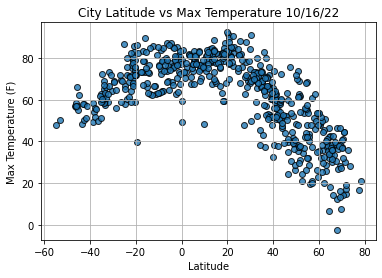

In [22]:
#Import time
import time
import matplotlib.pyplot as plt

#Build the scatter plot for latitude vs max temperature
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
            
#Incorporate the other graph properties 
plt.title(f"City Latitude vs Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig1.png")

#Show plot
plt.show()

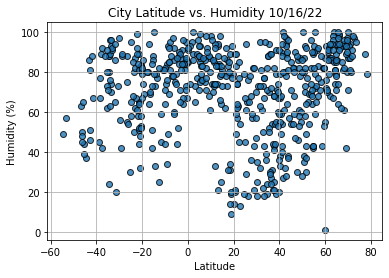

In [23]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

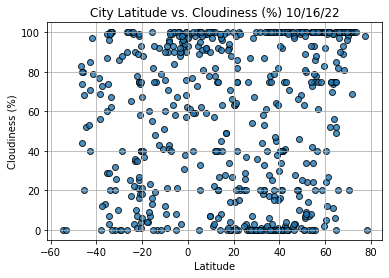

In [24]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

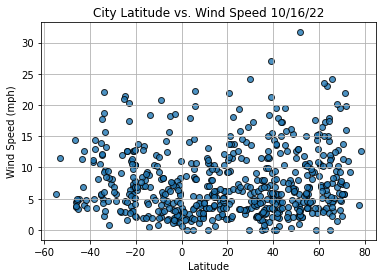

In [25]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

# Linear Regression

In [26]:
#Import linear regression from the SciPy stats module; 
from scipy.stats import linregress

In [27]:
# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

In [28]:
# Perform linear regression. will take 2 arguments, the x and y and return slope, y itercept, r value, p-value and std.error
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.45x + 92.94
The p-value is: 0.011


In [29]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(lat * slope + intercept) for lat in lats]

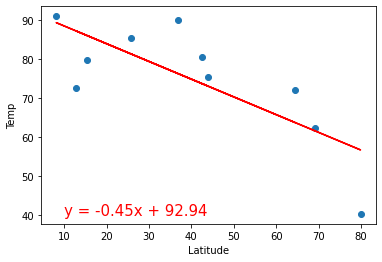

In [30]:
# Import Matplotlib.
import matplotlib.pyplot as plt
# Create a scatter plot of the x and y values which are our latitudes and temperatures
plt.scatter(lats,temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

# Finding Correlation Between Latitude and Maximum Temperature

In [31]:
# Import linregress.
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

# Perform linear regression.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept

# Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot of the x and y values.
    plt.scatter(x_values,y_values)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
    plt.plot(x_values,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
    plt.annotate(line_eq, (10,40), fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel('Temp')
    plt.show()

# Create the Hemisphere DataFrames 

In [32]:
#To create a new DataFrame from the current DataFrame, we use the loc method on the current DataFrame. 
# loc method accesses a group of rows and columns in the current DataFrame by an index, labels, or a Boolean array
index13 = city_data_df.loc[13]
index13

City                 San Patricio
Country                        US
Date          2022-10-16 23:43:09
Lat                        28.017
Lng                      -97.5169
Max Temp                    87.75
Humidity                       57
Cloudiness                     54
Wind Speed                  11.23
Name: 13, dtype: object

In [47]:
#Create the Northern and Southern Hemisphere DataFrames
Northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
Southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
city_data_df.loc[(city_data_df["Lat"]>=0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Victoria,HK,2022-10-16 23:40:54,22.2855,114.1577,82.26,45,100,18.01
1,Xining,CN,2022-10-16 23:43:06,36.6167,101.7667,37.47,54,3,2.62
3,Paamiut,GL,2022-10-16 23:43:07,61.9940,-49.6678,35.82,68,100,12.06
9,Westerland,DE,2022-10-16 23:43:08,54.9079,8.3033,47.95,93,75,3.44
11,Adrar,MR,2022-10-16 23:43:09,20.5022,-10.0711,91.60,20,63,1.81


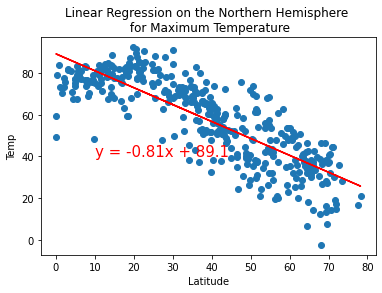

In [34]:
#generate the linear regression on the maximum temperature for the Northern Hemisphere
x_values = Northern_hemi_df["Lat"]
y_values = Northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 
                        'Max Temp',(10,40))

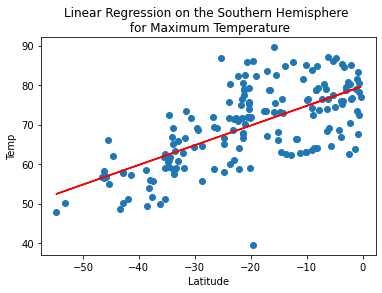

In [65]:
### Perform Linear Regression on The Maximum Temperature for the Southern Hemisphere
x_values = Southern_hemi_df["Lat"]
y_values = Southern_hemi_df["Max Temp"]

#Call the function
plot_linear_regression(x_values, y_values, 
                      'Linear Regression on the Southern Hemisphere \n for Maximum Temperature',
                      'Max Temp',(-50,90))


The correlation between the latitude and the maximum temperature is strong to very strong because the r-value is less than –0.7 for the Northern Hemisphere and greater than 0.7 for the Southern Hemisphere, as shown by the plots here. This means that as we approach the equator, 0° latitude, the temperatures become warmer. And when we are further from the equator the temperatures become cooler. Check the r-values for your plots. 

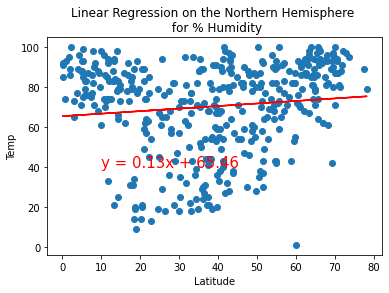

In [36]:
#Perform Linear Regression on the Percent Humidity for the Northern Hemisphere 
x_values = Northern_hemi_df["Lat"]
y_values = Northern_hemi_df["Humidity"]
#Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity',
                       '%Humidity',(-40,10))

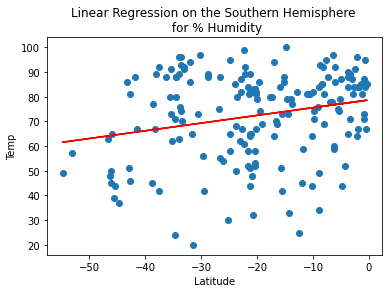

In [76]:
# Linear regression on the Southern Hemisphere
x_values = Southern_hemi_df["Lat"]
y_values = Southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

# Linear Regression on the % Cloudiness

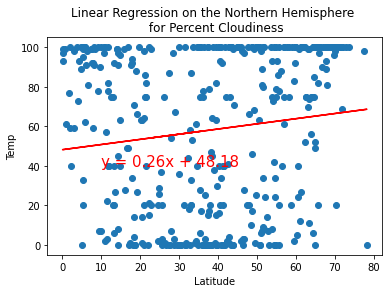

In [72]:
#Linear Regression on the Northern Hemisphere
x_values = Northern_hemi_df["Lat"]
y_values = Northern_hemi_df["Cloudiness"]

# Call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \n for Percent Cloudiness',
                      '% Cloudiness', (40, 40))

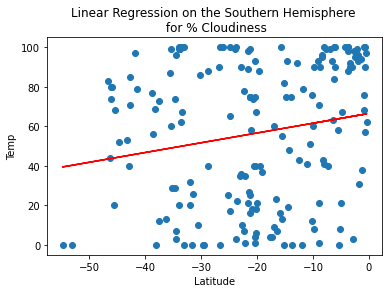

In [71]:
#Linear Regression on the Southern Hemisphere
x_values = Southern_hemi_df["Lat"]
y_values = Southern_hemi_df["Cloudiness"]

# Call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \n for % Cloudiness','% Cloudiness', (50, 60))

FINDING:

The correlation between the latitude and percent cloudiness is very low because the r-value is less than –0.09 for the Northern Hemisphere and less than –0.02 for the Southern Hemisphere for the plots shown here. This means that cloudiness is unpredictable due to changing weather patterns that can increase or decrease percent cloudiness. Check the r-values for your plots. 

# Find the Correlation Between Latitude and Wind Speed

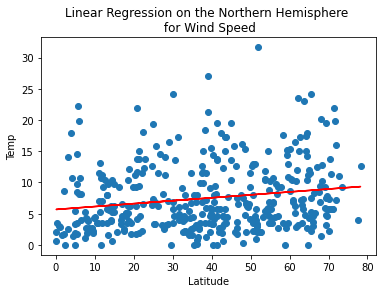

In [63]:
#Creating the linear equation plot on the latitude and wind speed for the Northern and Southern Hemispheres
# Linear regression on the Northern Hemisphere
x_values = Northern_hemi_df["Lat"]
y_values = Northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 
                       'Wind Speed',(50,35))

#### FINDING
The correlation between the latitude and wind speed is very low because the r-value is less  than –0.07 for the Northern Hemisphere and less than –0.3 for the Southern Hemisphere for the plots shown here. This means that wind speed is unpredictable due to changing weather patterns that can increase or decrease wind speed. Check the r-values for your plots. 